git fastFM - https://github.com/ibayer/fastFM <br>
import fastFM conda - https://github.com/ibayer/fastFM/issues/51

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# !curl -o /content/drive/MyDrive/click-trough/train.csv.zip -L
# !unzip -q /content/drive/MyDrive/click-trough/train.csv.zip

In [7]:
# !curl -o /content/drive/MyDrive/click-trough/test.csv.zip -L
# !unzip -q /content/drive/MyDrive/click-trough/test.csv.zip

In [3]:
import pandas as pd
import numpy as np
from tqdm import *

In [4]:
# train = pd.read_csv('train-2.csv')

In [5]:
chunksize = 10 ** 7
num_of_chunk = 0
train = pd.DataFrame()
lines = pd.read_csv('train-2.csv', chunksize=chunksize)


for chunk in tqdm(lines):
    num_of_chunk = num_of_chunk + 1
    train = pd.concat([train,chunk.sample(frac=0.01)], axis = 0, ignore_index = True)
    # print(f'{str(num_of_chunk)} is done.')
train_copy = train.copy()

5it [02:04, 24.85s/it]


In [2]:
train = train_copy.copy()

NameError: name 'train_copy' is not defined

In [400]:
test = pd.read_csv('test-2.csv')
test_copy = test.copy()

In [401]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.644187e+19,0,14102108,1005,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
1,9.870590e+18,0,14102219,1005,0,85f751fd,c4e18dd6,50e219e0,450ee916,d9b5648e,...,1,0,21234,320,50,2434,3,163,100088,61
2,1.595388e+18,0,14102105,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,...,1,0,20006,320,50,2283,0,163,-1,95
3,1.123640e+19,0,14102107,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,21660,320,50,2446,3,171,100228,156
4,6.623077e+18,1,14102110,1005,1,0a742914,510bd839,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100077,23


In [402]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                404290 non-null  float64
 1   click             404290 non-null  int64  
 2   hour              404290 non-null  int64  
 3   C1                404290 non-null  int64  
 4   banner_pos        404290 non-null  int64  
 5   site_id           404290 non-null  object 
 6   site_domain       404290 non-null  object 
 7   site_category     404290 non-null  object 
 8   app_id            404290 non-null  object 
 9   app_domain        404290 non-null  object 
 10  app_category      404290 non-null  object 
 11  device_id         404290 non-null  object 
 12  device_ip         404290 non-null  object 
 13  device_model      404290 non-null  object 
 14  device_type       404290 non-null  int64  
 15  device_conn_type  404290 non-null  int64  
 16  C14               40

# Предобработка даннных


In [403]:
from datetime import datetime

In [404]:
# num = []
# cat = []

# for col in (train.columns):
#     if train[col].dtype == "object":
#         cat.append(col)
#     else:
#         num.append(col)
# print("num = ", num)
# print("\ncat = ", cat)

In [405]:
# train = train.drop(['site_id', 'app_id', 'device_id', 'device_ip', 'id', 'device_model'], axis=1)

In [406]:
train['hour'] = pd.to_datetime(train['hour'], format = '%y%m%d%H')

In [407]:
# year = []
# month = []
# day = []
# hour = []

# for item in train['hour'].map(str):
#     date_obj = datetime.strptime(item, '%Y-%m-%d %H:%M:%S')


#     year.append(date_obj.year)
#     month.append(date_obj.month)
#     day.append(date_obj.day)
#     hour.append(date_obj.hour)

# print(len(year))

# train.insert(loc=0, column='year', value=year)
# train.insert(loc=0, column='month', value=month)
# train.insert(loc=0, column='day', value=day)
# train.insert(loc=0, column='time', value=hour)

In [408]:
def hex_to_int(hex_str):
    return int(hex_str, 16)

In [409]:
# train["site_domain"] = train['site_domain'].apply(hex_to_int)
# train["app_domain"] = train['app_domain'].apply(hex_to_int)
# train["device_id"] = train['device_id'].apply(hex_to_int)
# train["device_model"] = train['device_model'].apply(hex_to_int)
# train["site_id"] = train['site_id'].apply(hex_to_int)
# train["app_id"] = train['app_id'].apply(hex_to_int)
# train["device_ip"] = train['device_ip'].apply(hex_to_int)

In [410]:
# train['site_category'] = train['site_category'].astype('category')
# train['site_category'] = train['site_category'].cat.codes

# train['app_category'] = train['app_category'].astype('category')
# train['app_category'] = train['app_category'].cat.codes

In [411]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                404290 non-null  float64       
 1   click             404290 non-null  int64         
 2   hour              404290 non-null  datetime64[ns]
 3   C1                404290 non-null  int64         
 4   banner_pos        404290 non-null  int64         
 5   site_id           404290 non-null  int64         
 6   site_domain       404290 non-null  int64         
 7   site_category     404290 non-null  int8          
 8   app_id            404290 non-null  int64         
 9   app_domain        404290 non-null  int64         
 10  app_category      404290 non-null  int8          
 11  device_id         404290 non-null  int64         
 12  device_ip         404290 non-null  int64         
 13  device_model      404290 non-null  int64         
 14  devi

# Визуалищация и анализ данных


In [412]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

([<matplotlib.patches.Wedge at 0x7f975cd37af0>,
 [Text(-0.9472611017032341, 0.5591926369329047, '0'),
  Text(0.9472611540586231, -0.5591925482439173, '1')],
 [Text(-0.5166878736563094, 0.3050141655997662, '83%'),
  Text(0.5166879022137943, -0.3050141172239549, '17%')])

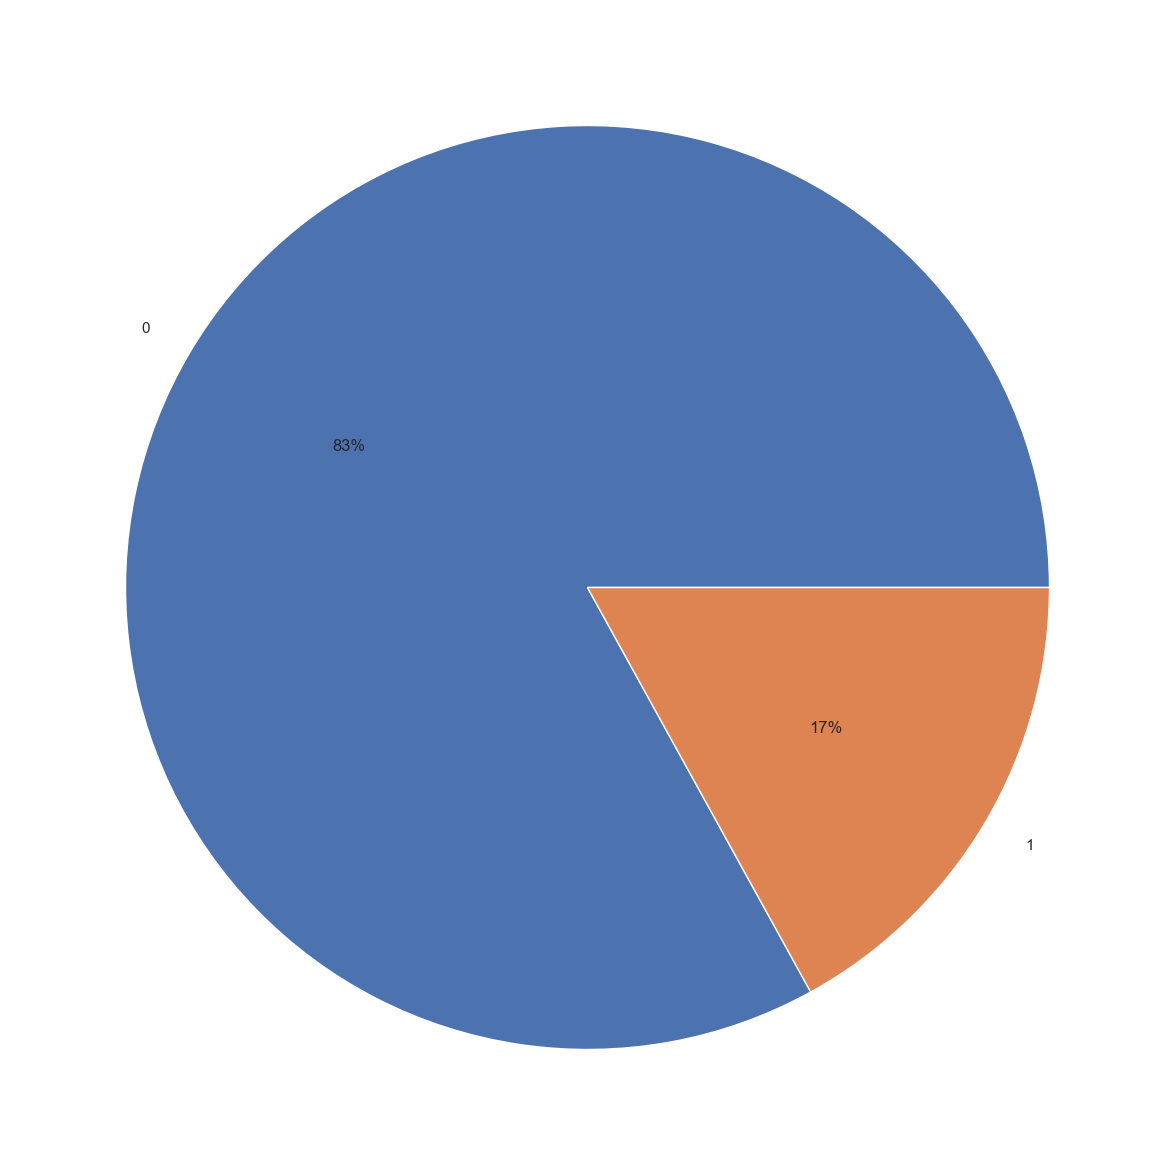

In [413]:
click = np.array([len(train.loc[train['click'] == 0]), len(train.loc[train['click'] == 1])])
plt.pie(click, labels=['0', '1'], autopct='%.0f%%')

<Axes: xlabel='banner_pos', ylabel='count'>

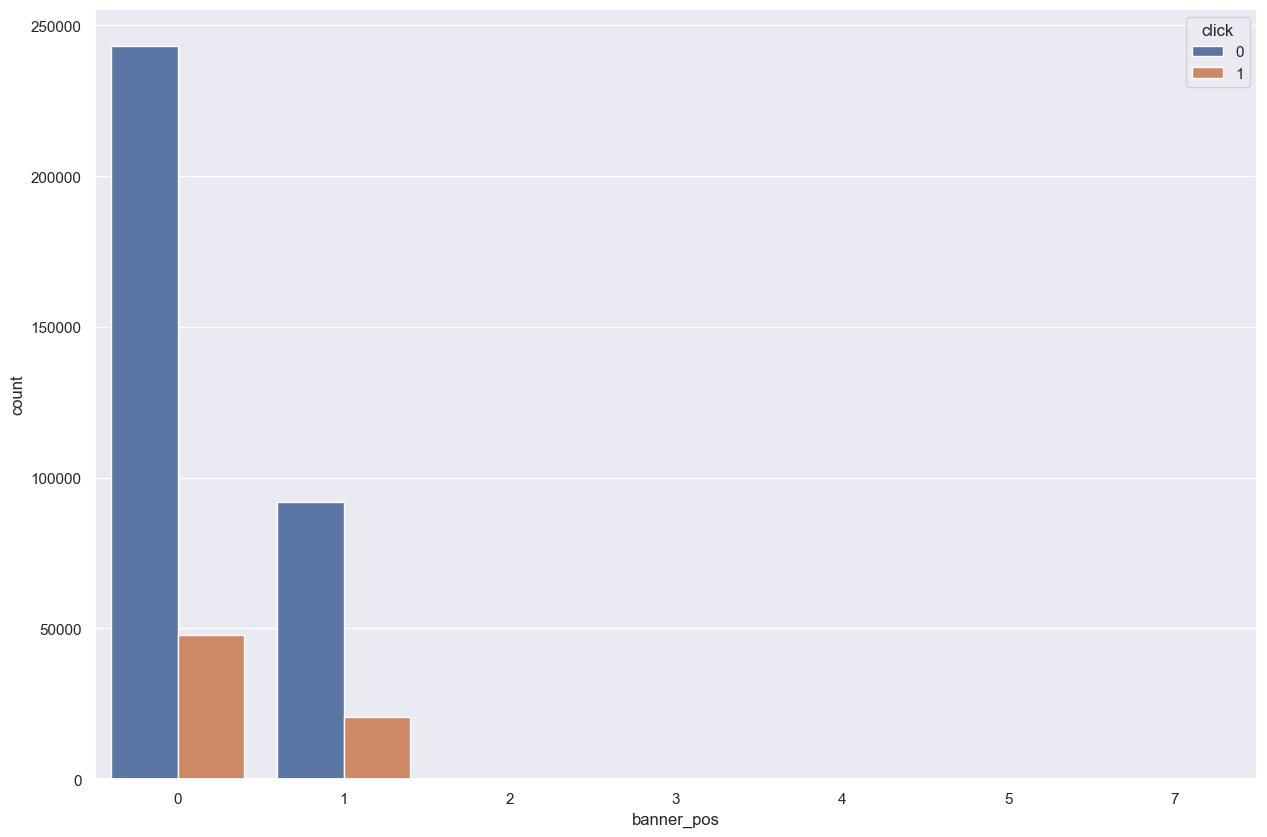

In [414]:
plt.figure(figsize=(15,10))
sns.countplot(x='banner_pos',hue='click',data=train)

<Axes: xlabel='hour', ylabel='count'>

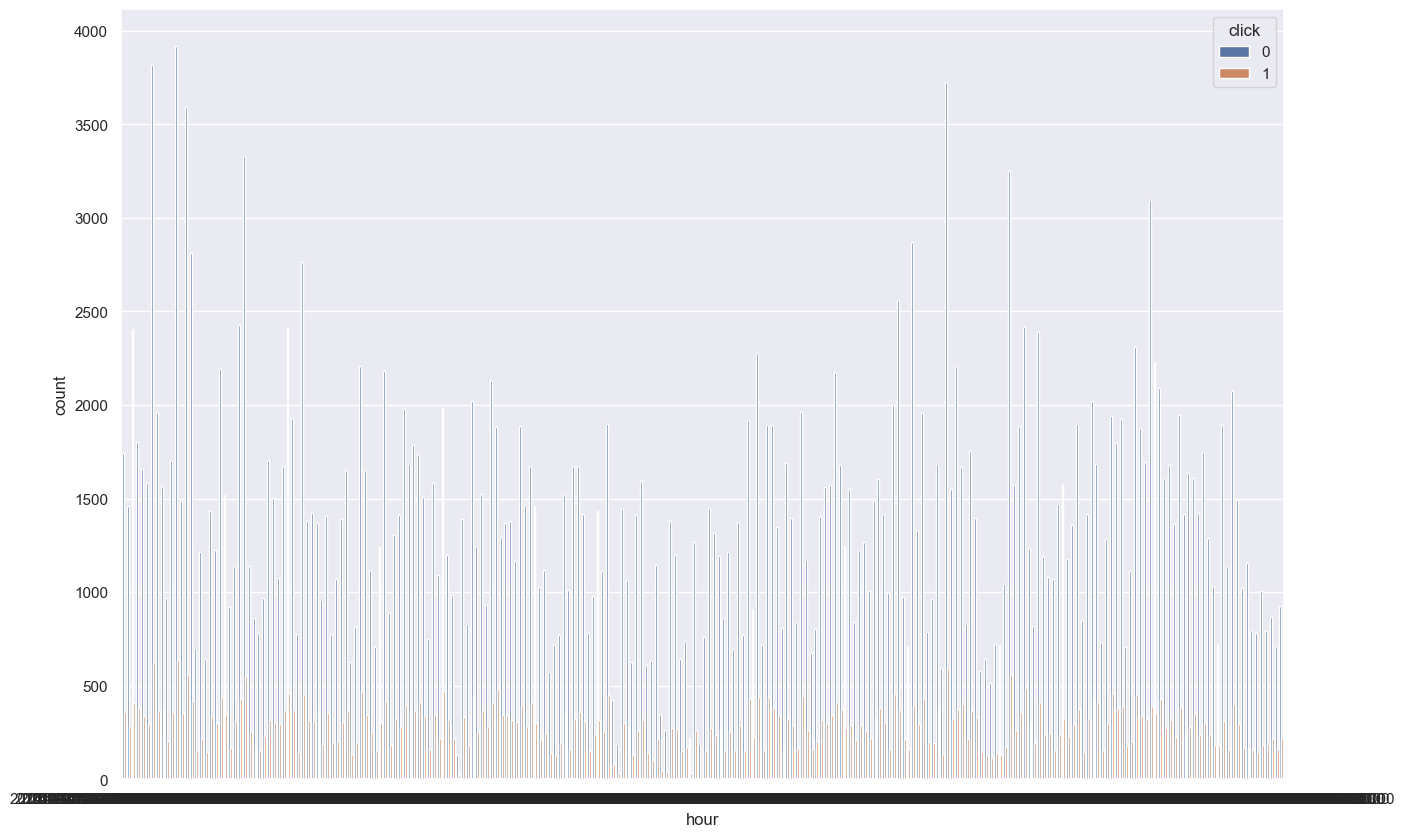

In [415]:
plt.figure(figsize=(15,10))
sns.countplot(x='hour',hue='click',data=train)

<Axes: xlabel='hour', ylabel='count'>

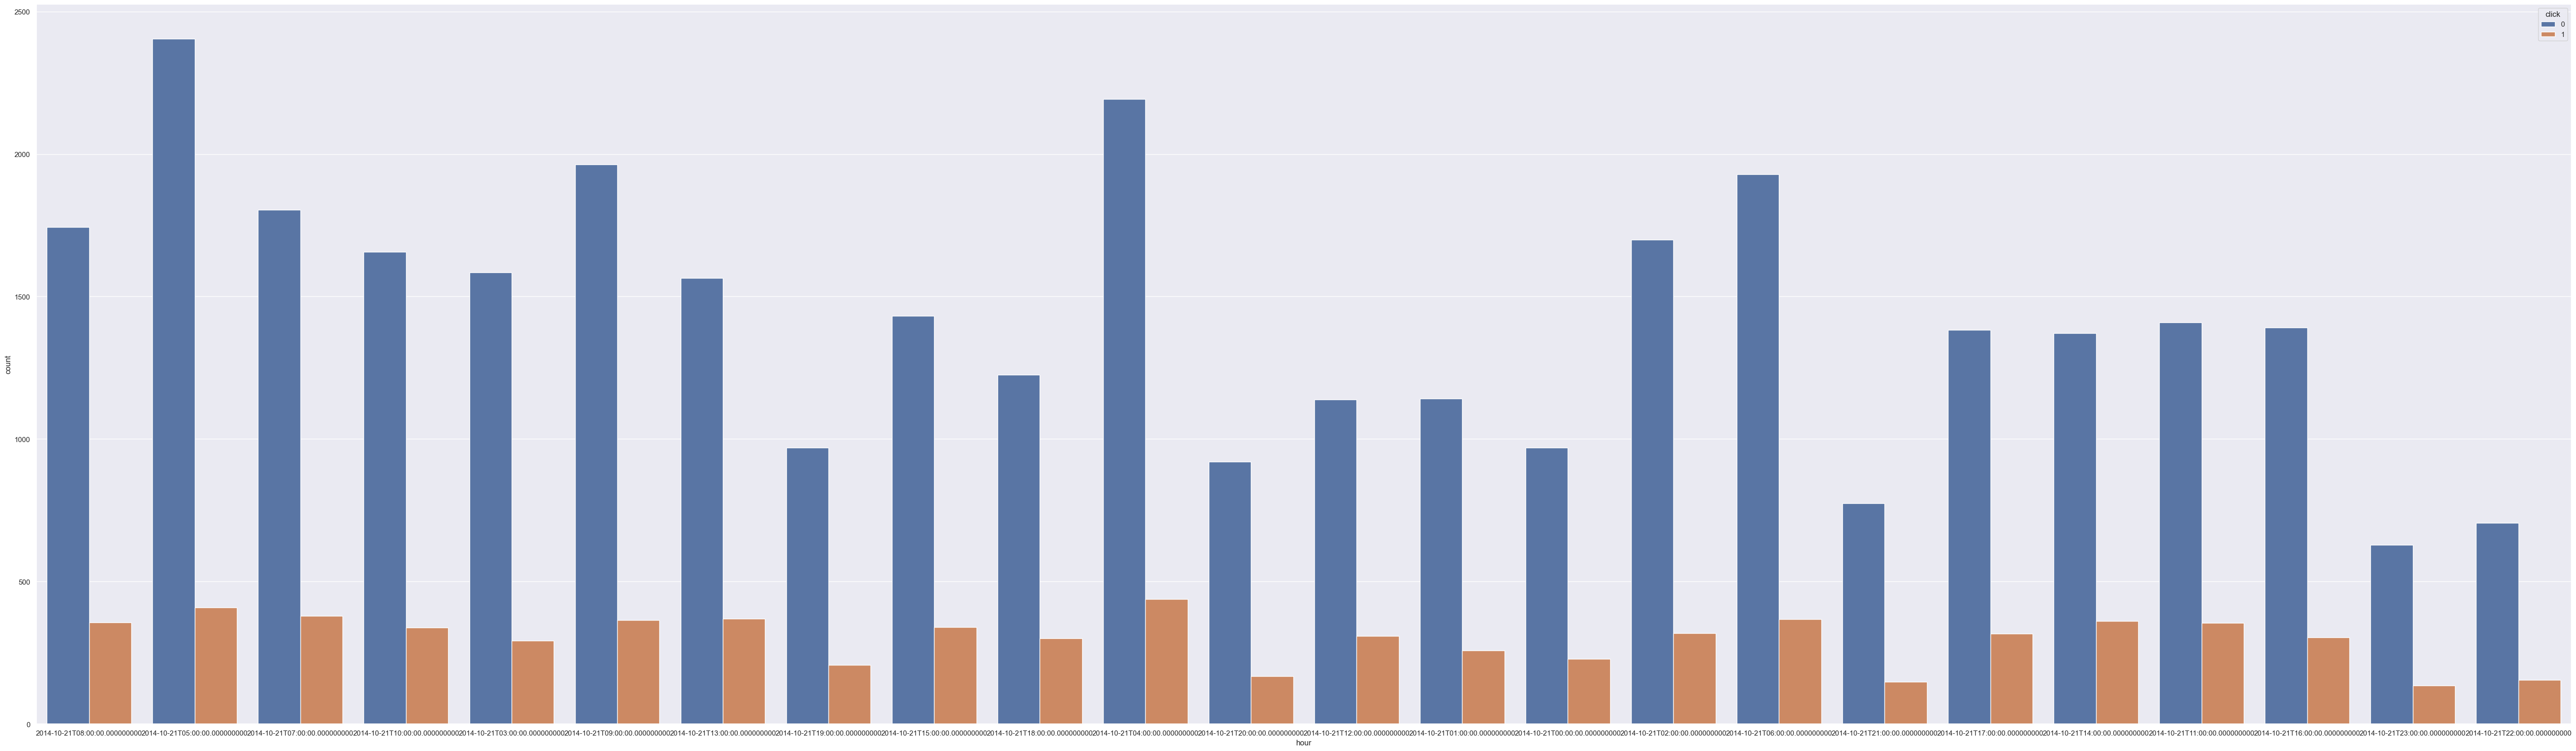

In [416]:
data_2014 = train[train['hour'] < '2014-10-22']
plt.figure(figsize=(70,20))
sns.countplot(x='hour',hue='click',data=data_2014)

In [417]:
train = train.drop(['hour'], axis=1)

In [418]:
# num = []
# cat = []

# for col in (train.columns):
#     if train[col].dtype == "object" or col =='id':
#         cat.append(col)
#     else:
#         num.append(col)
# print("num = ", num)
# print("\ncat = ", cat)

In [419]:
# num = []
# cat = []
# target_col = 'click'

# for col in (train.columns):
#     if col != 'click':
#         if 'C' in col and col != 'C1':
#             num.append(col)
#         else:
#             cat.append(col)

# print('num =', num)
# print('cat =', cat)

In [420]:
# #do one hot coding for some low cardinality columns first
# from sklearn.preprocessing import OneHotEncoder

# low_card_cols = ['banner_pos', 'device_conn_type','C15','C16','C18']
# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# X_train_mid = ohe.fit_transform(train[low_card_cols])
# X_test_mid = ohe.transform(test[low_card_cols])

In [421]:
# #target encoder
# #train and fit a target encoder
# #to solve the high cardinality problem within the data
# from category_encoders import TargetEncoder
# target_encoder = TargetEncoder()
# high_card_cols = ['site_id', 'site_domain','site_category','app_id','app_domain',
# 'app_category','device_id','device_ip','device_model','C17','C19','time']
# X_train_target = target_encoder.fit_transform(X_train[high_card_cols], y_train)
# X_test_target = target_encoder.transform(X_test[high_card_cols])

In [422]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
# # scaler = MinMaxScaler(feature_range=(0,1))
# scaler = StandardScaler()
# encoder = LabelEncoder()

In [423]:
# encoder.fit(train)

In [424]:
# for feat in cat:
#     train[feat] = encoder.transform(train[feat])
# train[num] = scaler.fit_transform(train[num], train[target_col])

In [425]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

In [426]:
# cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# # Инициализация масштабировщика для числовых признаков
# num_scaler = StandardScaler()

# # Создание ColumnTransformer для применения разных преобразований к разным типам столбцов
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', cat_encoder, cat),
#         ('num', num_scaler, num)
#     ])

# # Создание пайплайна для объединения кодировщика и масштабировщика
# pipeline = Pipeline([
#     ('preprocessor', preprocessor)
# ])

In [427]:
# pipeline.fit(train)

# # Применение пайплайна к обучающим и тестовым данным
# X_train_transformed = pipeline.transform(train)
# X_test_transformed = pipeline.transform(test)

In [428]:
train.head()

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.644187e+19,0,1005,0,653924678,3802520582,3,3970769798,2013391065,0,...,1,0,20366,320,50,2333,0,39,-1,157
1,9.870590e+18,0,1005,0,2247578109,3303116246,5,1158605078,3652543630,3,...,1,0,21234,320,50,2434,3,163,100088,61
2,1.595388e+18,0,1005,1,1531784922,379809523,18,3970769798,2013391065,0,...,1,0,20006,320,50,2283,0,163,-1,95
3,1.123640e+19,0,1005,0,2247578109,3303116246,5,3916666920,3744640937,20,...,1,0,21660,320,50,2446,3,171,100228,156
4,6.623077e+18,1,1005,1,175384852,1359730745,18,3970769798,2013391065,0,...,1,0,16208,320,50,1800,3,167,100077,23


In [429]:
sns.set(rc={'figure.figsize': (30, 30)})
train.corr()

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
id,1.000000,-0.000228,-0.000398,-0.000584,0.003792,0.001408,0.000374,-0.002471,0.002724,0.001415,...,-0.000426,0.002063,-0.000277,-0.000565,-0.001412,-0.000366,-0.000183,0.002952,-0.000639,-0.000708
click,-0.000228,1.000000,-0.037150,0.025028,-0.007384,-0.036259,-0.006841,0.069100,-0.003514,-0.048846,...,-0.038963,-0.083810,-0.058897,-0.032547,0.132519,-0.054207,0.020315,-0.002608,-0.054726,-0.068991
C1,-0.000398,-0.037150,1.000000,0.288836,0.001556,0.118667,0.031371,-0.220665,-0.004400,0.092810,...,0.895958,0.198031,0.055173,0.118965,0.063395,0.064389,-0.040343,0.002944,-0.035807,0.034997
banner_pos,-0.000584,0.025028,0.288836,1.000000,0.291479,-0.414419,0.532049,0.138395,0.058831,-0.223686,...,0.322602,-0.083380,-0.014893,0.061270,0.022299,-0.034633,0.095575,0.131630,0.057581,-0.097563
site_id,0.003792,-0.007384,0.001556,0.291479,1.000000,-0.254806,0.407245,-0.094051,-0.028472,0.086736,...,0.005037,0.040197,-0.015257,0.004202,-0.042110,-0.014275,0.302692,0.061751,0.076074,-0.155942
site_domain,0.001408,-0.036259,0.118667,-0.414419,-0.254806,1.000000,-0.590871,-0.229413,-0.069449,0.211571,...,0.104176,0.150063,0.016108,0.062409,-0.130832,0.037436,-0.187116,-0.027651,-0.075684,0.126457
site_category,0.000374,-0.006841,0.031371,0.532049,0.407245,-0.590871,1.000000,0.251346,0.076089,-0.231797,...,-0.013845,-0.155026,-0.000058,-0.004558,-0.108216,-0.018608,0.138621,0.111962,0.106939,-0.114143
app_id,-0.002471,0.069100,-0.220665,0.138395,-0.094051,-0.229413,0.251346,1.000000,0.184265,-0.522279,...,-0.253221,-0.368454,-0.057492,-0.052922,0.052383,-0.067178,-0.043159,0.013497,-0.012833,-0.045608
app_domain,0.002724,-0.003514,-0.004400,0.058831,-0.028472,-0.069449,0.076089,0.184265,1.000000,-0.246499,...,0.004559,-0.021415,0.029797,0.016318,0.013164,0.022575,-0.036329,-0.007126,0.183442,-0.097442
app_category,0.001415,-0.048846,0.092810,-0.223686,0.086736,0.211571,-0.231797,-0.522279,-0.246499,1.000000,...,0.084994,0.234895,0.001835,0.045087,-0.065261,0.023111,0.080675,0.018104,-0.056281,0.063214


In [430]:
train = train.drop(['id', 'site_id', 'site_category', 'app_domain', 'device_id', 'device_ip', 'device_model', 'C18', 'C19'], axis=1)

In [431]:
train.shape

(404290, 14)

<Axes: >

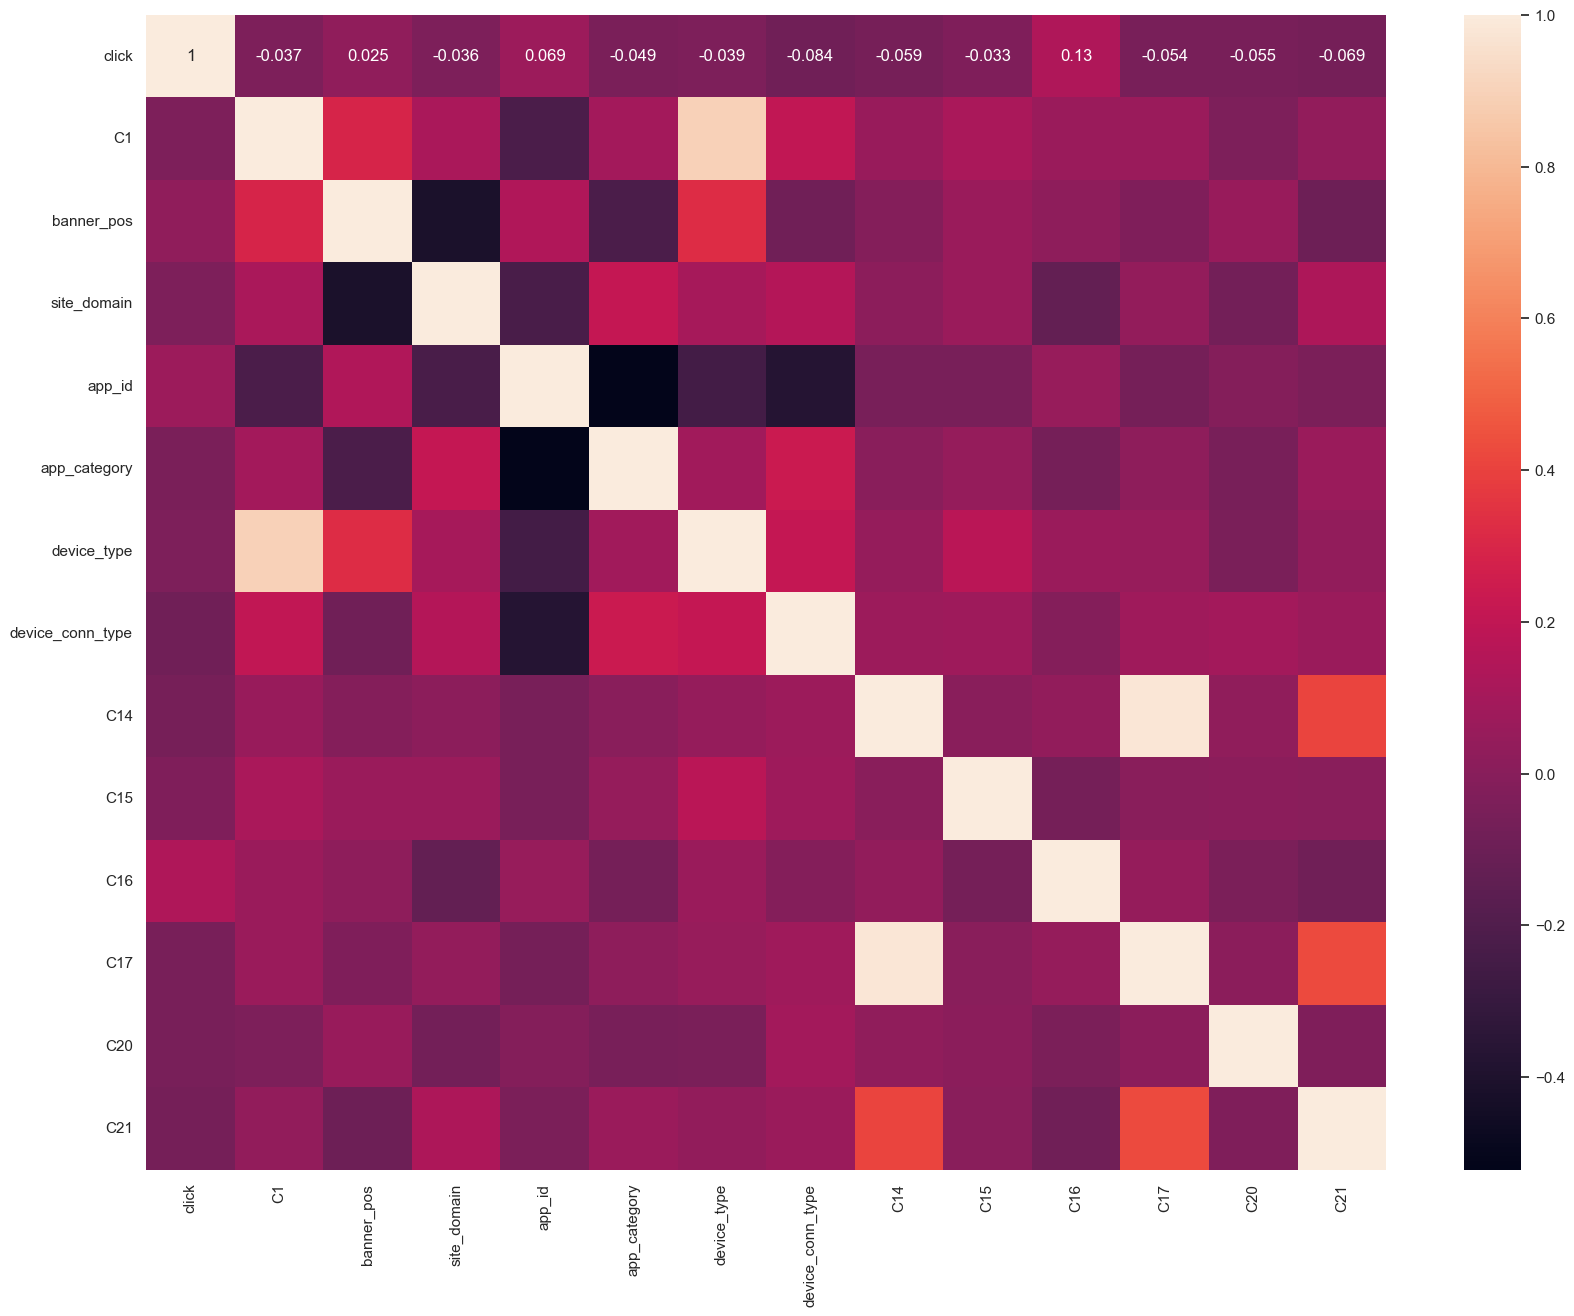

In [432]:
sns.set(rc={'figure.figsize': (20, 15)})
sns.heatmap(train.corr(), annot = True)

In [433]:
train

,click,C1,banner_pos,site_domain,app_id,app_category,device_type,device_conn_type,C14,C15,C16,C17,C20,C21
0,0,1005,0,3802520582,3970769798,0,1,0,20366,320,50,2333,-1,157
1,0,1005,0,3303116246,1158605078,3,1,0,21234,320,50,2434,100088,61
2,0,1005,1,379809523,3970769798,0,1,0,20006,320,50,2283,-1,95
3,0,1005,0,3303116246,3916666920,20,1,0,21660,320,50,2446,100228,156
4,1,1005,1,1359730745,3970769798,0,1,0,16208,320,50,1800,100077,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,1,1005,0,1988601966,3970769798,0,1,0,19015,300,250,2162,100161,33
404286,0,1005,1,2114524691,3970769798,0,1,2,22832,320,50,2647,100148,23
404287,0,1005,1,2114524691,3970769798,0,1,0,17747,320,50,1974,100019,33
404288,1,1005,0,3303116246,1011586125,3,1,0,16859,320,50,1887,-1,23


In [434]:
num = []
cat = []
target_col = 'click'

for col in (train.columns):
    if col != 'click':
        if 'C' in col and col != 'C1':
            num.append(col)
        else:
            cat.append(col)

print('num =', num)
print('cat =', cat)

num = ['C14', 'C15', 'C16', 'C17', 'C20', 'C21']
cat = ['C1', 'banner_pos', 'site_domain', 'app_id', 'app_category', 'device_type', 'device_conn_type']


In [435]:
from sklearn import preprocessing

scaled = preprocessing.StandardScaler()

scaled.fit(train.drop(['click'], axis=1)[num], train['click'])

StandardScaler()

In [436]:
train[num] = scaled.transform(train[num])

In [437]:
target = train['click']
items = train.drop('click', axis=1)

# Factorization Machines

In [58]:
# !sudo apt-get install libatlas-base-dev

# # Clone the repro including submodules (or clone + `git submodule update --init --recursive`)
# !git clone --recursive https://github.com/ibayer/fastFM-core.git

# # Build library
# !cd fastFM-core/; make;

# # Build command line interface (currently this works on linux only)
# !make cli

In [57]:
# !sudo apt-get install python-dev libopenblas-dev

# # Clone the repo including submodules (or clone + `git submodule update --init --recursive`)
# !git clone --recursive https://github.com/ibayer/fastFM.git

# # Enter the root directory
# !cd fastFM

# # Install Python dependencies (Cython>=0.22, numpy, pandas, scipy, scikit-learn)
# !pip install -r ./requirements.txt

# # Compile the C extension.
# !make                      # build with default python version (python)
# !PYTHON=python3 make       # build with custom python version (python3)

# # Install fastFM
# !pip install Documents/Vseros/ctr/fastFM

In [34]:
# !pip install fastFM

In [62]:
# !g++ -shared -fPIC -o example.so fastFM/fastFM-core/include/ffm.h -lffm

clang: warning: treating 'c-header' input as 'c++-header' when in C++ mode, this behavior is deprecated [-Wdeprecated]
clang: error: cannot specify -o when generating multiple output files


In [60]:
# !gcc -shared -Wl,-soname,adder -o adder.so -fPIC fastFM/fastFM-core/include/ffm.h

clang: error: cannot specify -o when generating multiple output files


In [51]:
# from fastFM import als
import fastFM-core.fastFM.als.py
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer

ImportError: cannot import name 'als' from 'fastFM' (unknown location)

In [ ]:
vectorizer = DictVectorizer()

In [ ]:
X_sparse = vectorizer.fit_transform(items.to_dict(orient='records'))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_sparse, target, test_size=0.2, random_state=42)

In [ ]:
model = als.FMRegression(n_iter=2000, init_stdev=0.1, rank=2, l2_reg_w=0.1, l2_reg_V=0.5)

In [ ]:
model.fit(X_sparse, target)

## Test

In [ ]:
test = test_copy.copy()

In [ ]:
test

In [ ]:
test = test.drop('hour', axis=1)

In [ ]:
for feat in cat:
    if feat != 'click':
        test[feat] = encoder.fit_transform(test[feat])

test[num] = scaler.fit_transform(test[num])

In [ ]:
test = test.drop(['id', 'site_id', 'site_category', 'app_domain', 'device_id', 'device_ip', 'device_model', 'C19'], axis=1)

In [ ]:
test_sparse = vectorizer.fit_transform(test.to_dict(orient='records'))

In [ ]:
predictions_test = model.predict_proba(test_sparse)

In [ ]:
subission = pd.read_csv('/content/drive/MyDrive/click-trough/sampleSubmission.csv')

In [ ]:
predictions_test.shape

In [ ]:
subission['click'] = predictions_test

In [ ]:
subission.to_csv('itog_sampleSubmission_FM-FA.csv',index=False)

# Factorization Machines + FA

## Факторный анализ


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_components = 7  # Задайте желаемое количество факторов
fa = PCA(n_components=n_components)

In [ ]:
X_fa = fa.fit_transform(items)

In [ ]:
X_fa = pd.DataFrame(fa.components_, columns=items.columns)

In [ ]:
X_fa

In [ ]:
fa.explained_variance_ratio_

In [ ]:
items.shape

In [ ]:
items_fa = pd.DataFrame(fa.transform(items), columns=fa.get_feature_names_out())

In [ ]:
items_fa.shape

In [ ]:
items_fa

## Factorization Machines

In [ ]:
!pip install fastFM

In [ ]:
from fastFM import als
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer

In [ ]:
items_fa

In [ ]:
vectorizer = DictVectorizer()

In [ ]:
X_sparse = vectorizer.fit_transform(items_fa.to_dict(orient='records'))

In [ ]:
# X = items_fa[['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6']].values
# y = target.values

In [ ]:
# X = items[list(items.columns)].values
# y = target.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sparse, target, test_size=0.1, random_state=42)

In [ ]:
model = als.FMRegression(n_iter=1000, init_stdev=0.1, rank=2, l2_reg_w=0.1, l2_reg_V=0.5)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

### Test

In [ ]:
test = pd.read_csv('test-2.csv')

In [ ]:
test_copy = test.copy()

In [ ]:
test

In [ ]:
test['hour'] = pd.to_datetime(test['hour'], format = '%y%m%d%H')

In [ ]:
year = []
month = []
day = []
hour = []

for item in test['hour'].map(str):
    date_obj = datetime.strptime(item, '%Y-%m-%d %H:%M:%S')


    year.append(date_obj.year)
    month.append(date_obj.month)
    day.append(date_obj.day)
    hour.append(date_obj.hour)

print(len(year))

test.insert(loc=0, column='year', value=year)
test.insert(loc=0, column='month', value=month)
test.insert(loc=0, column='day', value=day)
test.insert(loc=0, column='time', value=hour)

In [ ]:
test['site_category'] = test['site_category'].astype('category')
test['site_category'] = test['site_category'].cat.codes

test['app_category'] = test['app_category'].astype('category')
test['app_category'] = test['app_category'].cat.codes

In [ ]:
test = test.drop(['site_id', 'app_id', 'device_id', 'device_ip', 'id', 'device_model', 'hour', 'month', 'year', 'site_domain', 'app_domain'], axis=1)

In [ ]:
test_items_scaled = scaler.transform(test)

In [ ]:
test_items = pd.DataFrame(test_items_scaled, columns=train.drop('click', axis=1).columns)

In [ ]:
test_items_fa = pd.DataFrame(fa.transform(test_items), columns=fa.get_feature_names_out())

In [ ]:
test_items_fa

In [ ]:
test_sparse = vectorizer.fit_transform(test_items_fa.to_dict(orient='records'))

In [ ]:
predictions_test = model.predict(test_sparse)

In [ ]:
predictions_test.shape

In [ ]:
data = {
    'id': test_copy["id"].values.tolist(),
    'click': predictions_test.tolist()
}

In [ ]:
subission = pd.DataFrame(data, columns=["id", "click"])

In [ ]:
subission

In [ ]:
subission.to_csv('/content/drive/MyDrive/click-trough/submission.csv',index=False)

In [ ]:
subission_1 = pd.read_csv('/content/drive/MyDrive/click-trough/sampleSubmission.csv')

In [ ]:
subission_1['click'] = predictions_test

In [ ]:
subission_1

In [ ]:
subission_1.to_csv('/content/drive/MyDrive/click-trough/itog_sampleSubmission.csv',index=False)

# Classic

## SGDClassifier

In [50]:
from sklearn.linear_model import SGDClassifier

In [80]:
sgd = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    n_iter_no_change=80,
    shuffle=True,
    max_iter=10000,
    warm_start=True
)

In [81]:
np.unique(target)

array([0, 1])

In [82]:
sgd.partial_fit(items, target, classes=np.unique(target))

SGDClassifier(loss='log_loss', max_iter=10000, n_iter_no_change=80,
              warm_start=True)

### Test

In [83]:
test = test_copy.copy()

In [84]:
test = test.drop('hour', axis=1)

In [85]:
# for feat in cat:
#     if feat != 'click':
#         test[feat] = encoder.fit_transform(test[feat])

# test[num] = scaler.fit_transform(test[num])

In [86]:
test["site_domain"] = test['site_domain'].apply(hex_to_int)
test["app_domain"] = test['app_domain'].apply(hex_to_int)
test["device_id"] = test['device_id'].apply(hex_to_int)
test["device_model"] = test['device_model'].apply(hex_to_int)
test["site_id"] = test['site_id'].apply(hex_to_int)
test["app_id"] = test['app_id'].apply(hex_to_int)
test["device_ip"] = test['device_ip'].apply(hex_to_int)

In [87]:
test['site_category'] = test['site_category'].astype('category')
test['site_category'] = test['site_category'].cat.codes

test['app_category'] = test['app_category'].astype('category')
test['app_category'] = test['app_category'].cat.codes

In [88]:
test = test.drop(['id', 'site_id', 'site_category', 'app_domain', 'device_id', 'device_ip', 'device_model', 'C18', 'C19'], axis=1)

In [89]:
predictions_test = sgd.predict(test)

In [90]:
subission = pd.read_csv('sampleSubmission.csv')

In [91]:
subission['click'] = predictions_test

In [92]:
subission[subission['click'] == 1]

,id,click


In [124]:
subission.shape

(4577464, 2)

In [93]:
subission.to_csv('SGD_submission.csv', index=False)

## SGDClassifier + FA

## Факторный анализ

In [316]:
from sklearn.decomposition import PCA

In [317]:
n_components = 6  # Задайте желаемое количество факторов
fa = PCA(n_components=n_components)

In [318]:
X_fa = fa.fit_transform(items)

In [319]:
X_fa = pd.DataFrame(fa.components_, columns=train.drop('click', axis=1).columns)

In [320]:
X_fa

,id,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,-1.000000e+00,8.158877e-23,5.544590e-23,-7.528360e-13,-2.680894e-13,-4.789978e-22,4.667316e-13,-3.534137e-13,-1.607313e-21,-1.449579e-13,...,4.208439e-23,-3.312189e-22,5.203134e-23,1.059199e-22,2.648914e-22,6.857920e-23,3.433366e-23,-5.537265e-22,1.198399e-22,1.328897e-22
1,-1.268774e-13,3.094525e-12,7.846818e-12,2.747466e-02,-2.284932e-02,1.378341e-10,-1.251628e-04,-3.173075e-03,-1.427968e-12,7.207516e-04,...,2.090667e-12,-4.541444e-12,2.077873e-12,2.915114e-13,1.964729e-12,1.767925e-12,1.335494e-11,-1.204683e-12,3.671987e-12,-5.576621e-12
2,-2.231421e-13,6.556905e-11,6.844315e-11,2.108166e-01,-1.633903e-01,1.038983e-09,-1.269730e-02,1.271924e-02,-5.022643e-11,-2.524378e-03,...,3.229232e-11,-5.934681e-12,-2.668007e-11,-9.098321e-12,6.460530e-13,-2.851009e-11,1.049301e-10,1.493988e-11,3.294736e-11,-5.940199e-11
3,-8.590191e-14,-1.479346e-10,1.860432e-10,5.735891e-01,-6.958654e-01,3.726448e-09,3.482555e-01,7.298798e-02,-1.300448e-09,3.916495e-02,...,-7.132310e-11,-1.328059e-10,-2.163124e-11,-4.253690e-11,6.482114e-11,-3.503155e-11,2.061980e-10,4.380324e-11,7.319020e-11,-1.429566e-10
4,-7.529247e-13,1.556851e-10,2.182356e-12,6.070783e-01,1.440801e-01,-1.963826e-10,-7.449072e-01,-1.708633e-01,2.643311e-09,-1.134696e-01,...,8.788474e-11,2.389285e-10,2.788070e-11,4.321659e-11,-7.373720e-11,3.795982e-11,1.699589e-10,2.285752e-11,1.858122e-11,-2.848653e-11
5,3.962912e-13,4.117517e-11,4.197893e-11,-5.070672e-01,-6.834104e-01,5.543310e-10,-4.979520e-01,-1.392414e-01,9.295169e-10,-9.157351e-02,...,4.252453e-11,8.463239e-11,3.206424e-11,-3.081334e-11,1.318400e-10,1.699860e-11,-7.488643e-12,-2.979649e-11,-1.631001e-12,4.232002e-11


In [321]:
fa.explained_variance_ratio_

array([1.00000000e+00, 5.37719624e-20, 5.22244098e-20, 4.83233976e-20,
       4.15715877e-20, 2.26451111e-20])

In [322]:
items.shape

(404290, 22)

In [323]:
items_fa = pd.DataFrame(fa.transform(items), columns=fa.get_feature_names_out())

In [324]:
items_fa.shape

(404290, 6)

In [325]:
items_fa

,pca0,pca1,pca2,pca3,pca4,pca5
0,-7.216477e+18,-1.817440e+09,-2.072637e+09,-8.075487e+08,-9.208072e+08,-2.002852e+08
1,-6.451949e+17,-1.776870e+09,8.203862e+08,-1.007035e+09,1.502552e+09,4.775170e+08
2,7.630007e+18,1.989242e+09,3.333951e+08,1.540588e+09,-1.126090e+09,1.662494e+09
3,-2.011006e+18,5.144736e+08,-1.357251e+08,1.122725e+08,-4.919760e+08,-9.037420e+08
4,2.602318e+18,-4.952015e+08,1.874943e+09,-3.332738e+08,-2.015726e+09,1.667479e+09
...,...,...,...,...,...,...
404285,5.051280e+16,-1.271166e+09,1.712249e+09,7.155560e+08,-4.486102e+08,7.674508e+07
404286,8.955921e+18,9.492219e+08,-9.126796e+08,2.017212e+09,6.794487e+08,-6.465025e+08
404287,-1.577303e+18,-1.623213e+09,7.623165e+08,1.685340e+09,5.077527e+08,-6.538981e+08
404288,7.931033e+18,2.024973e+09,-4.623379e+08,-1.205218e+09,2.550467e+09,1.232005e+09


## SGDClassifier

In [326]:
from sklearn.linear_model import SGDClassifier

In [327]:
sgd = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    n_iter_no_change=80,
    shuffle=True,
    max_iter=10000,
    warm_start=True
)

In [328]:
np.unique(target)

array([0, 1])

In [329]:
sgd.partial_fit(items_fa, target, classes=np.unique(target))

SGDClassifier(loss='log_loss', max_iter=10000, n_iter_no_change=80,
              warm_start=True)

### Test

In [330]:
test = test_copy.copy()

In [331]:
test = test.drop('hour', axis=1)

In [332]:
test["site_domain"] = test['site_domain'].apply(hex_to_int)
test["app_domain"] = test['app_domain'].apply(hex_to_int)
test["device_id"] = test['device_id'].apply(hex_to_int)
test["device_model"] = test['device_model'].apply(hex_to_int)
test["site_id"] = test['site_id'].apply(hex_to_int)
test["app_id"] = test['app_id'].apply(hex_to_int)
test["device_ip"] = test['device_ip'].apply(hex_to_int)

In [333]:
test['site_category'] = test['site_category'].astype('category')
test['site_category'] = test['site_category'].cat.codes

test['app_category'] = test['app_category'].astype('category')
test['app_category'] = test['app_category'].cat.codes

In [116]:
# test = test.drop(['id', 'site_id', 'site_category', 'app_domain', 'device_id', 'device_ip', 'device_model', 'C18', 'C19'], axis=1)

In [335]:
test[num] = scaled.transform(test[num])

In [336]:
test_items_fa = pd.DataFrame(fa.transform(test), columns=fa.get_feature_names_out())

In [342]:
predictions_test = sgd.predict_proba(test_items_fa)

In [343]:
subission = pd.read_csv('sampleSubmission.csv')

In [344]:
subission['click'] = predictions_test

In [348]:
subission['click'].value_counts()

1.0    2289176
0.0    2288288
Name: click, dtype: int64

In [350]:
subission.to_csv('SGD+FA_submission.csv', index=False)

## SGDRegressor + FA

In [438]:
from sklearn.linear_model import SGDRegressor

In [439]:
sgr = SGDRegressor(
    penalty='l2',
    n_iter_no_change=80,
    shuffle=True,
    max_iter=5000,
    warm_start=True
)

In [440]:
sgr.fit(items, target)

/Users/kekgerman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(max_iter=5000, n_iter_no_change=80, warm_start=True)

### Test

In [448]:
test = test_copy.copy()

In [449]:
test = test.drop('hour', axis=1)

In [450]:
test["site_domain"] = test['site_domain'].apply(hex_to_int)
test["app_domain"] = test['app_domain'].apply(hex_to_int)
test["device_id"] = test['device_id'].apply(hex_to_int)
test["device_model"] = test['device_model'].apply(hex_to_int)
test["site_id"] = test['site_id'].apply(hex_to_int)
test["app_id"] = test['app_id'].apply(hex_to_int)
test["device_ip"] = test['device_ip'].apply(hex_to_int)

In [451]:
test['site_category'] = test['site_category'].astype('category')
test['site_category'] = test['site_category'].cat.codes

test['app_category'] = test['app_category'].astype('category')
test['app_category'] = test['app_category'].cat.codes

In [453]:
test = test.drop(['id', 'site_id', 'site_category', 'app_domain', 'device_id', 'device_ip', 'device_model', 'C18', 'C19'], axis=1)

In [454]:
test[num] = scaled.transform(test[num])

In [446]:
# test_items_fa = pd.DataFrame(fa.transform(test), columns=fa.get_feature_names_out())

In [463]:
predictions_test = sgr.predict(test)

In [456]:
subission = pd.read_csv('sampleSubmission.csv')

In [457]:
subission['click'] = predictions_test

In [467]:
subission[subission['click']]

KeyError: "None of [Float64Index([-1.0250472898713544e+27, -1.0166788393257458e+27,\n              -1.0166788393257458e+27,  -6.284454975164498e+26,\n               -7.596568900799665e+26,  -6.427516435221968e+26,\n               -1.016678839325746e+27,   -5.83827482661922e+26,\n                -9.09201742026546e+26, -1.0166788393257458e+27,\n              ...\n               -7.279207683026821e+26,  -7.542127999454295e+26,\n               -9.339629926338142e+26, -1.0166788393257448e+27,\n               -7.343216707724064e+26,  -7.094727808875785e+26,\n              -1.0166788393257448e+27,  -7.094727808875785e+26,\n               -7.435480874954006e+26, -1.0166788393257446e+27],\n             dtype='float64', length=4577464)] are in the [columns]"

In [395]:
subission.to_csv('SGDR+FA_submission.csv', index=False)

## CatBoostClassifier

In [ ]:
!conda install -c "conda-forge/label/cf201901" catboost

done
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::arrow==1.2.2=pyhd3eb1b0_0
  - defaults/noarch::requests-file==1.5.1=pyhd3eb1b0_0
  - defaults/osx-64::botocore==1.27.28=py39hecd8cb5_0
  - defaults/osx-64::bottleneck==1.3.5=py39h67323c0_0
  - defaults/osx-64::astroid==2.11.7=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/osx-64::anaconda-project==0.11.1=py39hecd8cb5_0
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  - defaults/osx-64::datashape==0.5.4=py39hecd8cb5_1
  - defaults/osx-64::boto3==1.24.28=py39hecd8cb5_0
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/noarch::backports.functools_lru_cache==1.6.4=pyhd3eb1b0_0
  - defaults/osx-64::sip==

In [134]:
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

In [130]:
cat = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3.0,
    border_count=128,
    cat_features=[0, 1, 2],
    eval_metric='Logloss',
    custom_metric=['AUC']
)

NameError: name 'CatBoostClassifier' is not defined

In [128]:
cat.fit(X_train, Y_train)

AttributeError: 'list' object has no attribute 'fit'